In [1]:
# Libs
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot
import yulesimon as ys

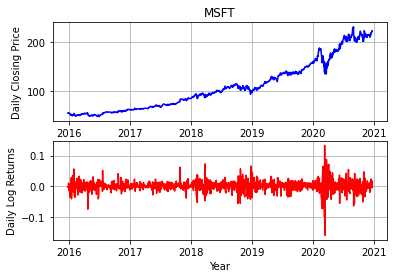

In [7]:
# Get 5 years of Microsoft log returns from Yahoo and plot results
security = 'MSFT'
nyears = 5
closing_prices, log_returns, dates = ys.GetYahooFeed(security,nyears)

# Make Figure(s)
ax1 = plt.subplot(211)
ax1.plot(dates,closing_prices,color='b')
ax1.grid(True)
ax1.set_ylabel('Daily Closing Price')
plt.title(security)

ax2 = plt.subplot(212)
ax2.plot(dates[1:],log_returns,color='r')
ax2.grid(True)
ax2.set_xlabel('Year')
ax2.set_ylabel('Daily Log Returns')

plt.show()

In [8]:
# Create a Yule-Simon time series object
Chain = ys.TimeSeries(log_returns)

In [9]:
# Do Inference 
nsteps = 2000
history = Chain.step(nsteps)

....................................................................................................

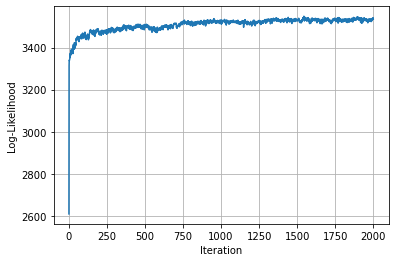

In [10]:
# Check convergence by plotting the log-likelihood
ax3 = plt.subplot()
ax3.plot(history.log_likelihood)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Log-Likelihood')
ax3.grid(True)
plt.show()

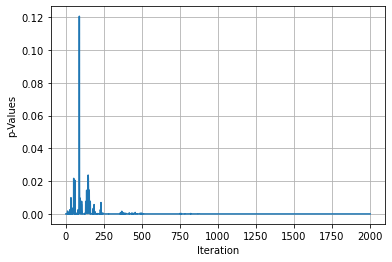

In [11]:
# Check convergence by plotting the log-likelihood
ax3 = plt.subplot()
ax3.plot(history.pvalue)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('p-Values')
ax3.grid(True)
plt.show()